In [3]:
pip install opencv-python -i https://pypi.tuna.tsinghua.edu.cn/simple


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
     --------------------------------------- 0.0/38.6 MB 100.4 kB/s eta 0:06:25
     --------------------------------------- 0.0/38.6 MB 100.4 kB/s eta 0:06:25
     --------------------------------------- 0.0/38.6 MB 100.4 kB/s eta 0:06:25
     --------------------------------------- 0.0/38.6 MB 100.4 kB/s eta 0:06:25
     --------------------------------------- 0.0/38.6 MB 100.4 kB/s eta 0:06:25
     ---------------------------------------- 0.0/38.6 MB 75.5 kB/s eta 0:08:32
     ---------------------------------------- 0.0/38.6 MB 75.5 kB/s eta 0:08:32
     --------------

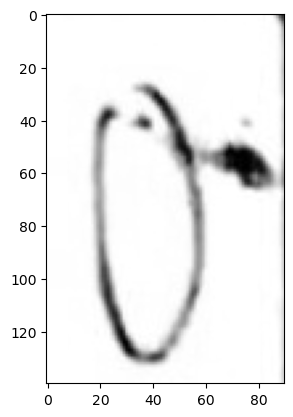

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "D:/Keras"

CATEGORIES = ["0", "1", "2", "3", "4","5","6","7","8","9"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  # create path to each number
    for img in os.listdir(path):  # iterate over each image per its number
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!


In [4]:
training_data = []
IMG_SIZE = 100

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()


100%|█████████████████████████████████████████████████████████████████████████████| 2016/2016 [00:18<00:00, 109.07it/s]


In [5]:
import random
random.shuffle(training_data)

X = []
y = []
imgh = 140
imgw = 90
for features,label in training_data:
    X.append(features)
    y.append(label)
    
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[145]
   [192]
   [238]
   ...
   [241]
   [239]
   [238]]

  [[171]
   [209]
   [243]
   ...
   [245]
   [240]
   [239]]

  [[187]
   [220]
   [247]
   ...
   [251]
   [250]
   [249]]

  ...

  [[237]
   [250]
   [248]
   ...
   [255]
   [255]
   [255]]

  [[231]
   [246]
   [250]
   ...
   [254]
   [255]
   [255]]

  [[214]
   [232]
   [245]
   ...
   [255]
   [255]
   [255]]]]


In [6]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pip install tensorflow
